Import the required libraries.

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#data analysis libraries 
import numpy as np
import pandas as pd
from statistics import mode
import re

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

Open and read the datasets.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


I will look at the summary statistics of the data using describe() method.

In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sundman, Mr. Johan Julian",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"McNeill, Miss. Bridget",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Feature Engineering and Selection

I will look at each feature in the dataset to check if it is relevant in predicting survived passengers.

In [8]:
#data types for each feature
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#check for sum of missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**In the train data, `Age`, `Cabin`and `Embarked` column have missing values.**

### Data visulaization to see how features correlate with survival.

- Pclass

In [10]:
#print percentage of people by Pclass that survived
Pclass_1 = train['Survived'][train['Pclass'] == 1].value_counts(normalize = True)[1]
print('Percentage of Pclass 1 who Survived: {:.0%}'.format(Pclass_1))

Pclass_2 = train['Survived'][train['Pclass'] == 2].value_counts(normalize = True)[1]      
print('Percentage of Pclass 2 who Survived: {:.0%}'.format(Pclass_2)) 
      
Pclass_3 = train['Survived'][train['Pclass'] == 3].value_counts(normalize = True)[1]      
print('Percentage of Pclass 3 who Survived: {:.0%}'.format(Pclass_3))

Percentage of Pclass 1 who Survived: 63%
Percentage of Pclass 2 who Survived: 47%
Percentage of Pclass 3 who Survived: 24%


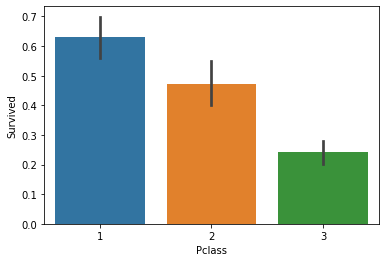

In [11]:
#bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

*Passengers in the higher class survived more compared to the lower classes.*

- Sex

In [12]:
#print percentages of females vs. males that survive
females_survived = train["Survived"][train["Sex"] == 'female'].value_counts(normalize=True)[1]
print('Percentage of Females who Survived: {:.0%}'.format(females_survived))

males_survived = train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True)[1]
print('Percentage of Males who Survived: {:.0%}'.format(males_survived))

Percentage of Females who Survived: 74%
Percentage of Males who Survived: 19%


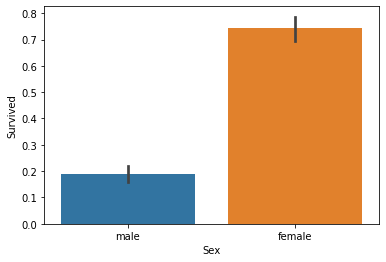

In [13]:
#bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

*More females survive compared to males. Therefore the sex feature will be significant in prediction.*

- SibSp

In [15]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

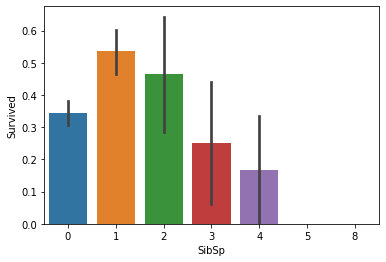

In [16]:
sns.barplot(x="SibSp", y="Survived", data=train);

*Passengers with between 1 and 2 siblings or spouses had a higher survival chance than the rest.*

- Parch

In [17]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

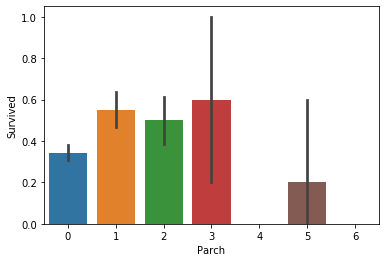

In [18]:
sns.barplot(x='Parch', y='Survived', data=train)
plt.show();

*Passengers with 3 parents or children survived more than the rest.*

- Embarked

In [19]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

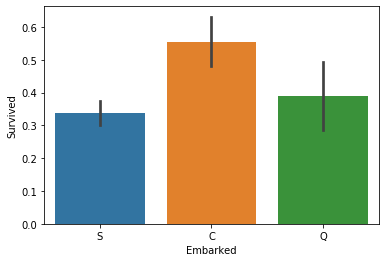

In [20]:
sns.barplot(x='Embarked', y="Survived", data=train)
plt.show()

*Passengers who embarked at C survived more than the rest.*

### Data Cleaning
I will merge the train and test datasets to perform the same changes in cleaning, then separate them.

I will fill in missing values and change data types in preparation of training the models.

In [21]:
#concateneate the train and test data
test['Survived'] = np.nan
full = pd.concat([train, test])

In [22]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#fill in the embarked with the most frequent
full['Embarked'] = full['Embarked'].fillna(mode(full['Embarked']))

In [25]:
# Numerically encode the 'Sex' variable
full["Sex"][full["Sex"] == "male"] = 0
full["Sex"][full["Sex"] == "female"] = 1

# Numerically encode the 'Embarked' variable
full["Embarked"][full["Embarked"] == "S"] = 0
full["Embarked"][full["Embarked"] == "C"] = 1
full["Embarked"][full["Embarked"] == "Q"] = 2

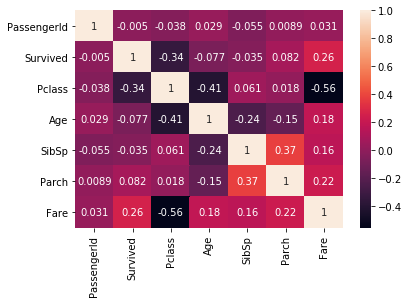

In [26]:
#a correlation heatmap of all the features
sns.heatmap(full.corr(), annot=True)

- correlation of `Age` and `Pclass` is the highest correlation in absolute numbers, so I'll use Pclass to impute the missing values:

In [27]:
full['Age'] = full.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

- correlation of `Fare` and `Pclass` is the highest correlation in absolute numbers, so I'll use Pclass to impute the missing values:

In [28]:
full['Fare']  = full.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

- I will fill in the `Cabin` missing values with 'U', which stands for Unknown.

In [29]:
full['Cabin'] = full['Cabin'].fillna('U')

In [30]:
full['Cabin'].nunique()

187

- Extraction of first alphabets from cabin by running a regular expression.

In [31]:
full['Cabin'] = full['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [32]:
full['Cabin'].nunique()

9

In [33]:
#map the cabin letters to numbers
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
full['Cabin'] = full['Cabin'].map(cabin_category)

In [34]:
full['Cabin'].unique().tolist()

[9, 3, 5, 7, 4, 1, 2, 6, 8]

- I will extract the titles from the `Name` column using regular expressions.

In [35]:
full['Name'] = full.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [36]:
full['Name'].value_counts(normalize = True) * 100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Ms           0.152788
Mlle         0.152788
Major        0.152788
Jonkheer     0.076394
Don          0.076394
Dona         0.076394
Sir          0.076394
Mme          0.076394
Lady         0.076394
Countess     0.076394
Capt         0.076394
Name: Name, dtype: float64

In [37]:
#rename the Name column to title
full.rename(columns={'Name' : 'Title'}, inplace=True)

In [38]:
full['Title'] = full['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Others')

In [39]:
#encode title with numeric
title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Others':5}
full['Title'] = full['Title'].map(title_category)
full['Title'].unique().tolist()

[1, 3, 2, 4, 5]

- I can get the size of each family aboard through the sum of `Sibsp` and `Parch` and 1 (the passenger).

In [40]:
full['familySize'] = full['SibSp'] + full['Parch'] + 1

- Let's drop the redundant features.

In [41]:
full.drop(['SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

In [42]:
full.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,familySize
0,1,0.0,3,1,0,22.0,7.2500,9,0,2
1,2,1.0,1,3,1,38.0,71.2833,3,1,2
2,3,1.0,3,2,1,26.0,7.9250,9,0,1
3,4,1.0,1,3,1,35.0,53.1000,3,0,2
4,5,0.0,3,1,0,35.0,8.0500,9,0,1


- Recovering the test set from the full set.

In [44]:
test = full[full['Survived'].isna()].drop(['Survived'], axis = 1)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Title        418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Fare         418 non-null    float64
 6   Cabin        418 non-null    int64  
 7   Embarked     418 non-null    object 
 8   familySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 32.7+ KB


In [46]:
test.head()

,PassengerId,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,familySize
0,892,3,1,0,34.5,7.8292,9,2,1
1,893,3,3,1,47.0,7.0000,9,0,2
2,894,2,1,0,62.0,9.6875,9,2,1
3,895,3,1,0,27.0,8.6625,9,0,1
4,896,3,3,1,22.0,12.2875,9,0,3


- Recovering the train dataset.

In [47]:
train = full[full['Survived'].notna()]

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Title        891 non-null    int64  
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    int64  
 8   Embarked     891 non-null    object 
 9   familySize   891 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 76.6+ KB


In [49]:
train.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,familySize
0,1,0.0,3,1,0,22.0,7.2500,9,0,2
1,2,1.0,1,3,1,38.0,71.2833,3,1,2
2,3,1.0,3,2,1,26.0,7.9250,9,0,1
3,4,1.0,1,3,1,35.0,53.1000,3,0,2
4,5,0.0,3,1,0,35.0,8.0500,9,0,1


In [50]:
train['Survived'] = train['Survived'].astype(np.int64)

- The selected features in the train data will now be split for trainig and validating.

In [51]:
features = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

- I will use the Gradient Boosting Classifier model for classification, because it falls under ensemble learning and avoids overfitting of data.

- I will check for the accuracy of the model using `accuracy_score` as an evaluation metric.

In [53]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
target_predictions = gbc.predict(X_test)
acc_gbc = round(accuracy_score(target_predictions, y_test) * 100, 2)
print(acc_gbc)

84.36


- With an acuracy score greater than 80%, I will use the selected model, `GradientBoostingClassifier`, to test the data.

In [54]:
test['Survived'] = gbc.predict(test.drop('PassengerId', axis=1))

- This is the output of the selected model on the test data.

In [57]:
test_predictions = test[['PassengerId', 'Survived']]

In [58]:
test_predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
